Libraries

In [ ]:
%pip install pandas torch torchvision numpy tqdm Pillow matplotlib


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.0 MB 640.0 kB/s eta 0:00:07
   - -------------------------------------- 0.1/4.0 MB 1.8 MB/s eta 0:00:03
   ----- ---------------------------------- 0.5/4.0 MB 4.7 MB/s eta 0:00:01
   ---------- ----------------------------- 1.0/4.0 MB 6.4 MB/s eta 0:00:01
   ---------------- ----------------------- 1.7/4.0 MB 8.2 MB/s eta 0:00:01
   -------------------- ------------------- 2.1/4.0 MB 8.8 MB/s eta 0:00:01
   --------------------------- ------------ 2.8/4.0 MB 9.8 MB/s eta 0:00:01
   -------------------------------- ------- 3.3/4.0 MB 10.0 MB/s eta 0:00:01
   ------------------------------------- -- 3.7/4.0 MB 10.0 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 9.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
%pip install https://github.com/openai/CLIP/archive/main.zip

     - 0 bytes ? 0:00:00
     - 10.2 kB ? 0:00:00
     - 33.6 kB 496.7 kB/s 0:00:00
     \ 95.0 kB 902.0 kB/s 0:00:00
     | 195.4 kB 1.1 MB/s 0:00:00
     | 260.2 kB 1.2 MB/s 0:00:00
     / 432.1 kB 1.5 MB/s 0:00:00
     / 573.4 kB 1.8 MB/s 0:00:00
     - 745.5 kB 2.0 MB/s 0:00:00
     - 796.7 kB 2.0 MB/s 0:00:00
     \ 796.7 kB 2.0 MB/s 0:00:00
     \ 897.0 kB 1.8 MB/s 0:00:00
     | 1.1 MB 2.0 MB/s 0:00:00
     | 1.2 MB 2.0 MB/s 0:00:00
     / 1.2 MB 2.0 MB/s 0:00:00
     / 1.4 MB 2.0 MB/s 0:00:00
     - 1.5 MB 2.2 MB/s 0:00:00
     - 1.7 MB 2.2 MB/s 0:00:00
     \ 1.7 MB 2.2 MB/s 0:00:00
     \ 1.8 MB 2.1 MB/s 0:00:00
     | 1.9 MB 2.1 MB/s 0:00:00
     / 2.1 MB 2.1 MB/s 0:00:00
     / 2.3 MB 2.3 MB/s 0:00:01
     - 2.5 MB 2.4 MB/s 0:00:01
     - 2.9 MB 2.6 MB/s 0:00:01
     \ 3.1 MB 2.7 MB/s 0:00:01
     \ 3.4 MB 2.9 MB/s 0:00:01
     | 3.5 MB 3.0 MB/s 0:00:01
     | 3.8 MB 3.0 MB/s 0:00:01
     / 4.2 MB 3.2 MB/s 0:00:01
     / 4.3 MB 3.2 MB/s 0:00:01
  Installing build dependenci

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import torch
import clip
from PIL import Image
from tqdm import tqdm
import numpy as np
from pathlib import Path
from sklearn.metrics.pairwise import cosine_similarity


Embendings

In [ ]:
device = "cpu"
model_clip, preprocess = clip.load("ViT-B/32", device=device)

def extract_clip_embedding(img_path):
    """Return a 512-dim CLIP embedding for a single image path."""
    try:
        image = preprocess(Image.open(img_path).convert("RGB")).unsqueeze(0).to(device)
        with torch.no_grad():
            emb = model_clip.encode_image(image).cpu().numpy()[0]  # (512,)
        return emb
    except Exception as e:
        print(f"Error with image {img_path}: {e}")
        return None

#Image and results directory
IMAGE_DIR = Path("C:/Users/tbarbosa/Downloads/Fotos")
OUTPUT_PATH = Path("C:/Users/tbarbosa/Downloads/clip_embeddings.csv")

#Get all image files
image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.webp'}
image_files = [f for f in IMAGE_DIR.iterdir() 
               if f.suffix.lower() in image_extensions]

image_names = []
image_embeddings = []

#Process each image
for img_path in tqdm(image_files, desc="Computing CLIP embeddings"):
    emb = extract_clip_embedding(img_path)
    if emb is not None:
        image_names.append(img_path.stem)  # Just the name without extension
        image_embeddings.append(emb)

#Convert to numpy array
image_embeddings = np.array(image_embeddings, dtype="float32")
print(f"Processed {len(image_names)} images")
print("Embeddings shape:", image_embeddings.shape)

#L2-normalize embeddings
norms = np.linalg.norm(image_embeddings, axis=1, keepdims=True)
image_embeddings_norm = image_embeddings / np.clip(norms, 1e-9, None)

#Create DataFrame with image names and embeddings
emb_df = pd.DataFrame(image_embeddings_norm)
emb_df.insert(0, "image_name", image_names)

#Save to CSV
emb_df.to_csv(OUTPUT_PATH, index=False)



Computing CLIP embeddings:  51%|█████     | 4804/9496 [19:33<17:05,  4.58it/s]  

Error with image C:\Users\tbarbosa\Downloads\Fotos\216726_DM_1.jpg: cannot identify image file 'C:\\Users\\tbarbosa\\Downloads\\Fotos\\216726_DM_1.jpg'


Computing CLIP embeddings: 100%|██████████| 9496/9496 [38:13<00:00,  4.14it/s]


Processed 9495 images
Embeddings shape: (9495, 512)


Image Grouping

In [61]:
df_product = pd.read_csv("C:/Users/tbarbosa/Downloads/Dataset + Description-20251116/df_product.csv")
emb_df = pd.read_csv("C:/Users/tbarbosa/Downloads/clip_embeddings.csv")

C:\Users\tbarbosa\AppData\Local\Temp\ipykernel_48996\692771876.py:1: DtypeWarning: Columns (35,36,38,39,47,48,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_product = pd.read_csv("C:/Users/tbarbosa/Downloads/Dataset + Description-20251116/df_product.csv")


In [ ]:
df_product['product_id'] = df_product['PROG_IMAGE'].str.split('/').str[-1]

result_df = emb_df.merge(
    df_product[['product_id','L3_DES','L4_DES','PROD_REF']], 
    left_on='image_name', 
    right_on='product_id', 
    how='left'
)
result_df['DES_CONC'] = (
    result_df['L3_DES'].fillna('Other').astype(str) + '_' + 
    result_df['L4_DES'].fillna('Other').astype(str)
)

result_df = result_df.drop(columns=['product_id', 'L3_DES', 'L4_DES']).drop_duplicates()



result_df.shape


(9498, 515)

Similarity

In [ ]:
embedding_cols = [str(i) for i in range(512)]


# Create a mapping: image_name -> embeddings (ONLY numeric columns)
emb_dict = {}
for _, row in emb_df.iterrows():
    img_name = row['image_name']
    # Extract ONLY the numeric embedding columns
    embedding = row[embedding_cols].values.astype(np.float32)
    emb_dict[img_name] = embedding

print(f"\nCreated embeddings for {len(emb_dict)} images")
print(f"Sample embedding shape: {list(emb_dict.values())[0].shape}")
print(f"Sample embedding dtype: {list(emb_dict.values())[0].dtype}")

# Pre-create lookup dictionaries for fast access
prod_ref_dict = dict(zip(result_df['image_name'], result_df['PROD_REF']))
des_conc_dict = dict(zip(result_df['image_name'], result_df['DES_CONC']))

# Get embeddings for result_df images only
result_embeddings = []
result_image_names = []
for img_name in result_df['image_name']:
    if img_name in emb_dict:
        result_embeddings.append(emb_dict[img_name])
        result_image_names.append(img_name)

all_embeddings = np.array(result_embeddings)

# Create index mapping for faster lookups
image_to_global_idx = {name: i for i, name in enumerate(result_image_names)}

print(f"Total images with embeddings: {len(all_embeddings)}")
print(f"All embeddings shape: {all_embeddings.shape}")
print(f"All embeddings dtype: {all_embeddings.dtype}\n")

# Store results in a list
similarity_results = []

# Process each DES_CONC group with progress bar
for des_conc, group in tqdm(result_df.groupby('DES_CONC'), desc="Processing groups"):
    # Build both image list and embeddings together to ensure synchronization
    group_data = [(name, emb_dict[name]) for name in group['image_name'] if name in emb_dict]
    
    if not group_data:
        continue
    
    group_image_names, group_embeddings_list = zip(*group_data)
    group_image_names = list(group_image_names)
    group_embeddings = np.array(group_embeddings_list, dtype=np.float32)
    
    # Pre-create group PROD_REF lookup for faster access
    group_prod_refs = {name: prod_ref_dict[name] for name in group_image_names}
    
    # Calculate cosine similarity matrix within group (vectorized - fast!)
    group_sim_matrix = cosine_similarity(group_embeddings)
    
    # For each image in the group
    for idx, (original_idx, row) in enumerate(group.iterrows()):
        img_name = row['image_name']
        if img_name not in emb_dict:
            continue
        
        # Get PROD_REF of current image
        current_prod_ref = row['PROD_REF']
        
        # Find index in group_image_names
        try:
            img_group_idx = group_image_names.index(img_name)
        except ValueError:
            continue
            
        # Get similarity scores within group (exclude self and same PROD_REF)
        group_similarities = group_sim_matrix[img_group_idx].copy()
        
        # Vectorized exclusion: self and same PROD_REF
        for group_idx, group_img_name in enumerate(group_image_names):
            if group_img_name == img_name or group_prod_refs[group_img_name] == current_prod_ref:
                group_similarities[group_idx] = -1
        
        # Step 1: Get images >= 90% similarity in group
        above_90_mask = group_similarities >= 0.90
        above_90_group = np.where(above_90_mask)[0]
        
        if len(above_90_group) > 0:
            above_90_group = above_90_group[np.argsort(-group_similarities[above_90_group])]
        
        selected_indices = []
        selected_scores = []
        
        if len(above_90_group) >= 4:
            # We have enough similar images in group
            for sim_idx in above_90_group:
                selected_indices.append(group_image_names[sim_idx])
                selected_scores.append(group_similarities[sim_idx])
        else:
            # Step 2: Add all >= 90% from group first
            for sim_idx in above_90_group:
                selected_indices.append(group_image_names[sim_idx])
                selected_scores.append(group_similarities[sim_idx])
            
            # Step 3: Fill up to 4 with top similar from group
            if len(selected_indices) < 4:
                # Get valid indices (similarity > -1 and not already selected)
                valid_mask = group_similarities > -1
                valid_indices = np.where(valid_mask)[0]
                
                if len(valid_indices) > 0:
                    sorted_valid = valid_indices[np.argsort(-group_similarities[valid_indices])]
                    
                    for sim_idx in sorted_valid:
                        if sim_idx not in above_90_group:
                            selected_indices.append(group_image_names[sim_idx])
                            selected_scores.append(group_similarities[sim_idx])
                            if len(selected_indices) >= 4:
                                break
            
            # Step 4: If still < 4, search globally for >= 90%
            if len(selected_indices) < 4:
                current_embedding = emb_dict[img_name].reshape(1, -1)
                global_similarities = cosine_similarity(current_embedding, all_embeddings)[0]
                
                # Create exclusion mask (vectorized)
                selected_set = set(selected_indices)
                selected_set.add(img_name)
                
                # Vectorized exclusion
                for i, name in enumerate(result_image_names):
                    if name in selected_set or prod_ref_dict.get(name) == current_prod_ref:
                        global_similarities[i] = -1
                
                # Get images >= 90% globally
                above_90_global = np.where(global_similarities >= 0.90)[0]
                
                if len(above_90_global) > 0:
                    above_90_global = above_90_global[np.argsort(-global_similarities[above_90_global])]
                    
                    for global_idx in above_90_global:
                        selected_indices.append(result_image_names[global_idx])
                        selected_scores.append(global_similarities[global_idx])
                        if len(selected_indices) >= 4:
                            break
                
                # Step 5: If still < 4, get top 4 globally
                if len(selected_indices) < 4:
                    valid_global = np.where(global_similarities > -1)[0]
                    
                    if len(valid_global) > 0:
                        sorted_global_indices = valid_global[np.argsort(-global_similarities[valid_global])]
                        
                        for global_idx in sorted_global_indices:
                            selected_indices.append(result_image_names[global_idx])
                            selected_scores.append(global_similarities[global_idx])
                            if len(selected_indices) >= 4:
                                break
        
        # Store results
        result_row = {'original_idx': original_idx}
        for rank, (similar_name, score) in enumerate(zip(selected_indices, selected_scores), 1):
            result_row[f'similar_image_{rank}'] = similar_name
            result_row[f'similarity_score_{rank}'] = score
        
        similarity_results.append(result_row)

# Convert to DataFrame and merge with result_df
print("\nMerging results...")
similarity_df = pd.DataFrame(similarity_results)
result_df = result_df.merge(similarity_df, left_index=True, right_on='original_idx', how='left')
result_df = result_df.drop(columns=['original_idx'])

print("\nSimilarity calculation complete!")




Created embeddings for 9495 images
Sample embedding shape: (512,)
Sample embedding dtype: float32
Total images with embeddings: 9498
All embeddings shape: (9498, 512)
All embeddings dtype: float32



Processing groups: 100%|██████████| 95/95 [00:02<00:00, 40.46it/s]



Merging results...

Similarity calculation complete!


Function to test the Similarity

In [50]:
from pathlib import Path
import matplotlib.pyplot as plt

def show_similar_images(image_name, result_df, image_dir, max_images=8):
    """
    Display the original image and its similar images.
    
    Parameters:
    - image_name: Name of the image to find similar images for
    - result_df: DataFrame with similarity results
    - image_dir: Directory where images are stored
    - max_images: Maximum number of similar images to display
    """
    # Find the row for this image
    row = result_df[result_df['image_name'] == image_name]
    
    if row.empty:
        print(f"Image '{image_name}' not found in dataset")
        return
    
    row = row.iloc[0]
    
    # Collect similar images
    similar_images = []
    rank = 1
    while f'similar_image_{rank}' in result_df.columns and len(similar_images) < max_images:
        img = row[f'similar_image_{rank}']
        score = row[f'similarity_score_{rank}']
        
        if pd.notna(img):
            similar_images.append({
                'name': img,
                'score': score,
                'rank': rank
            })
        rank += 1
    
    if not similar_images:
        print(f"No similar images found for '{image_name}'")
        return
    
    # Find the file extension for the original image
    image_path = None
    for ext in ['.jpg', '.jpeg', '.png', '.bmp', '.webp']:
        potential_path = Path(image_dir) / f"{image_name}{ext}"
        if potential_path.exists():
            image_path = potential_path
            break
    
    if not image_path:
        print(f"Original image file not found for '{image_name}'")
        return
    
    # Calculate grid size
    num_images = len(similar_images) + 1  # +1 for original
    cols = min(4, num_images)
    rows = (num_images + cols - 1) // cols
    
    # Create figure
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    if rows == 1 and cols == 1:
        axes = [[axes]]
    elif rows == 1 or cols == 1:
        axes = axes.reshape(rows, cols)
    
    # Flatten axes for easier iteration
    axes_flat = axes.flatten()
    
    # Display original image
    try:
        original_img = Image.open(image_path)
        axes_flat[0].imshow(original_img)
        axes_flat[0].set_title(f"Original: {image_name}\nCategory: {row['DES_CONC']}", 
                               fontsize=10, fontweight='bold')
        axes_flat[0].axis('off')
    except Exception as e:
        print(f"Error loading original image: {e}")
        axes_flat[0].set_title(f"Error loading {image_name}")
        axes_flat[0].axis('off')
    
    # Display similar images
    for idx, sim_img in enumerate(similar_images, 1):
        # Find the image file
        img_path = None
        for ext in ['.jpg', '.jpeg', '.png', '.bmp', '.webp']:
            potential_path = Path(image_dir) / f"{sim_img['name']}{ext}"
            if potential_path.exists():
                img_path = potential_path
                break
        
        if img_path:
            try:
                img = Image.open(img_path)
                axes_flat[idx].imshow(img)
                axes_flat[idx].set_title(
                    f"#{sim_img['rank']}: {sim_img['name']}\n"
                    f"Score: {sim_img['score']:.3f}",
                    fontsize=9
                )
                axes_flat[idx].axis('off')
            except Exception as e:
                axes_flat[idx].set_title(f"Error loading image")
                axes_flat[idx].axis('off')
        else:
            axes_flat[idx].set_title(f"Image not found:\n{sim_img['name']}")
            axes_flat[idx].axis('off')
    
    # Hide unused subplots
    for idx in range(num_images, len(axes_flat)):
        axes_flat[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nShowing {len(similar_images)} similar images for '{image_name}'")

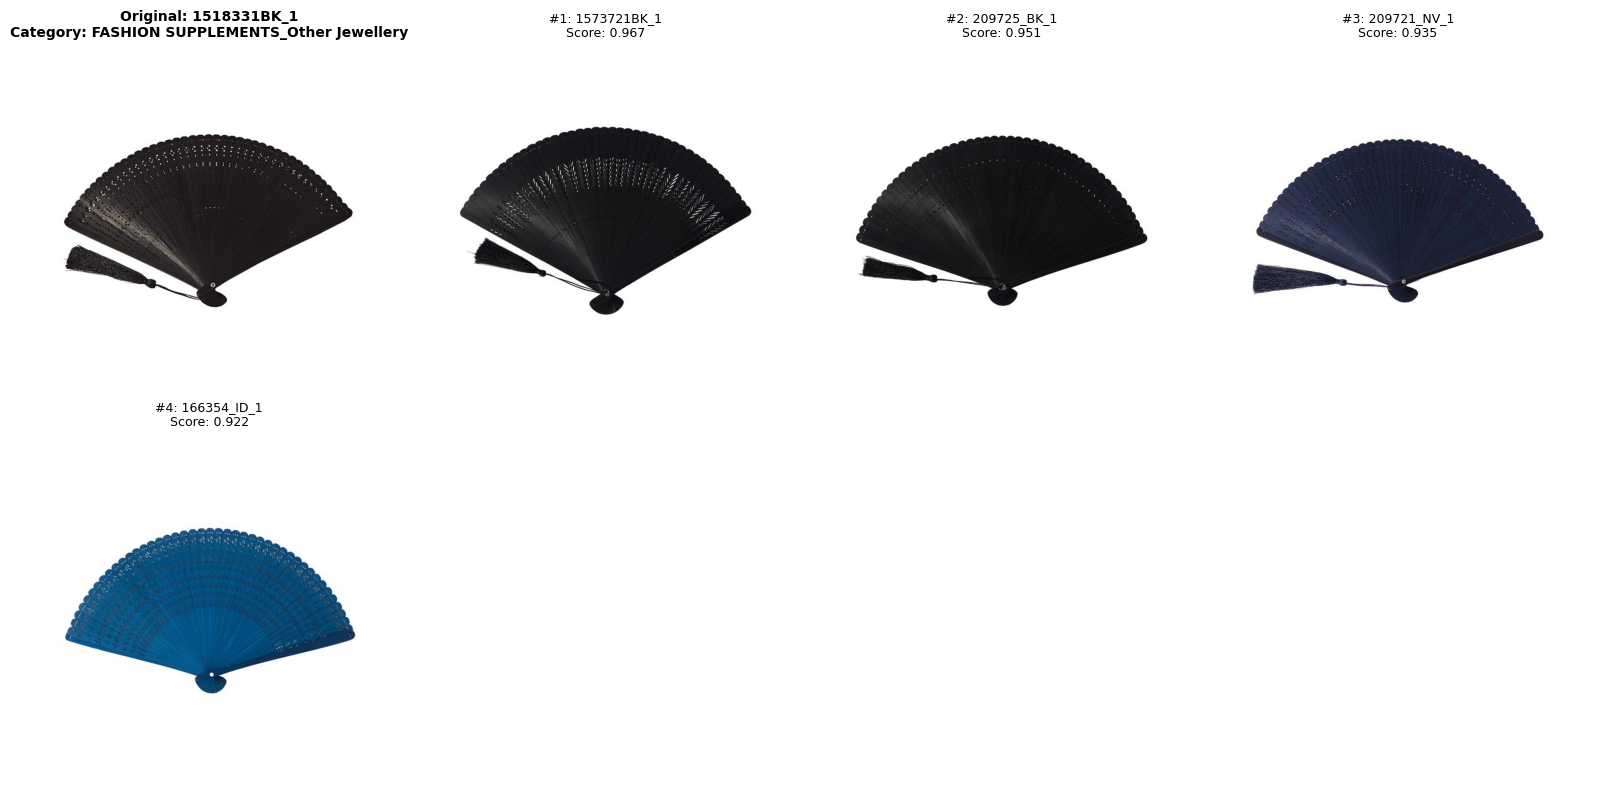


Showing 4 similar images for '1518331BK_1'


In [71]:
# Usage:
IMAGE_DIR = Path("C:/Users/tbarbosa/Downloads/Fotos")
image_name = "1518331BK_1" #Replace with your image name

show_similar_images(image_name, result_df, IMAGE_DIR, max_images=8)

Create Size, Colour, Price and Avg_Similar_Price Attributes

In [65]:
product_agg = df_product.groupby('PROD_REF').agg({
    'SZ_DES': lambda x: ', '.join(sorted(set(x.dropna()))),
    'CLR_DES': lambda x: ', '.join(sorted(set(x.dropna())))
}).reset_index()

product_agg.rename(columns={'SZ_DES': 'Sizes', 'CLR_DES': 'Color'}, inplace=True)


print(product_agg.head())

   PROD_REF    Sizes                                              Color
0    132850  L, M, S                                  Pastel Multicolor
1    140428        U                                              Brown
2    140486        U  Bright Multicolor, Halftone Multicolor, Navy, ...
3    145869        U                                               Blue
4    149404        U                                    Dark Multicolor


In [66]:
result_df = result_df.merge(product_agg,
    left_on='PROD_REF', 
    right_on='PROD_REF', 
    how='left'
)
result_df.shape

(9498, 1115)

In [67]:
df_sales = pd.read_csv('C:/Users/tbarbosa/Downloads/Dataset + Description-20251116/df_sales.csv')

In [ ]:

df_sales['price'] = df_sales['SALES_AMT_FX_RATE'] / df_sales['SALES_QTY']
price_map = df_sales.groupby('PROD_CLR_EQUIV')['price'].mean().to_dict()
prod_to_clr = dict(zip(df_product['product_id'], df_product['PROD_CLR_EQUIV']))

image_to_price = {}
for img_name in result_df['image_name']:
    prod_clr = prod_to_clr.get(img_name)
    if prod_clr:
        image_to_price[img_name] = price_map.get(prod_clr)

result_df['Price'] = result_df['image_name'].map(image_to_price)

# Step 6 optimized: Vectorized calculation
similar_cols = [col for col in result_df.columns if col.startswith('similar_image_')]

def calculate_avg_similar_price_fast(row):
    similar_images = [row[col] for col in similar_cols if pd.notna(row[col])]
    prices = [image_to_price.get(img) for img in similar_images]
    prices = [p for p in prices if pd.notna(p)]
    return np.mean(prices) if prices else np.nan

result_df['Avg_Similar_Price'] = result_df.apply(calculate_avg_similar_price_fast, axis=1)



In [69]:
result_df.to_csv('C:/Users/tbarbosa/Downloads/result_df.csv')